###Introduction to Big Data
- Final team project
- TEAM: 6
- Memebers: 22000245 문벼리, 22200105 김수빈, 22300453 오연수

In [ ]:
from google.colab import drive #Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd #pandas moduls import
import csv #csv moduls import
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IntBigData/Korea Income and Welfare.csv")

In [ ]:
data.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [ ]:
data.shape #Check the size of your data

(92857, 14)

In [ ]:
unique_id_count = data['id'].nunique() #Get total headcount using identifiers
print(unique_id_count)

10046


# Data preprocessing

In [ ]:
# Remove the top 1%
upper_limit = data['income'].quantile(0.99)
data = data[data['income'] <= upper_limit]

In [ ]:
# Calculate your age (as of 2018)
data['age'] = 2018 - data['year_born']

In [ ]:
# Create a generation variable
data['generation'] = pd.cut(data['year_born'], bins=[1930, 1960, 1980, 2000, 2020],
                                     labels=['1930s-60s', '1960s-80s', '1980s-2000s', '2000s+'])

In [ ]:
# Remove data to exclude: marriage == 1 (minor), marriage == 6 (other)
data = data[~data['marriage'].isin([1, 6])]

# create a marital status variable: 1 (ever married: 2, 3, 4), 0 (never married: 5)
data['has_marriage_experience'] = data['marriage'].apply(lambda x: 1 if x in [2, 3, 4] else 0)

<ipython-input-10-d3ff38d48df0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_marriage_experience'] = data['marriage'].apply(lambda x: 1 if x in [2, 3, 4] else 0)


In [ ]:
# 1930-1960 generation data
generation_1930_1960 = data[(data['year_born'] >= 1930) & (data['year_born'] < 1960)]
# 1960-1980 generation data
generation_1960_1980 = data[(data['year_born'] >= 1960) & (data['year_born'] < 1980)]
# 1980-2000 generation data
generation_1980_2000 = data[(data['year_born'] >= 1980) & (data['year_born'] < 2000)]

# 1930-1960 generation data

In [ ]:
# Step 1: Calculating the Education Level Distribution
education_level_distribution_1930_1960 = generation_1930_1960['education_level'].value_counts(normalize=True).reset_index()
education_level_distribution_1930_1960.columns = ['education_level', 'percentage']
education_level_distribution_1930_1960['percentage'] *= 100  # Convert ratios to percentages
education_level_distribution_1930_1960= education_level_distribution_1930_1960.sort_values(by='education_level', ascending=True )

In [ ]:
#Step2 : educatioin levels mapping
education_level_distribution_1930_1960['education_level']=["No learning (ages 7 and up)", "Elementary school",
     "Middle School", "High School", "Universities",
    "College degree", "MA", "PhD"]

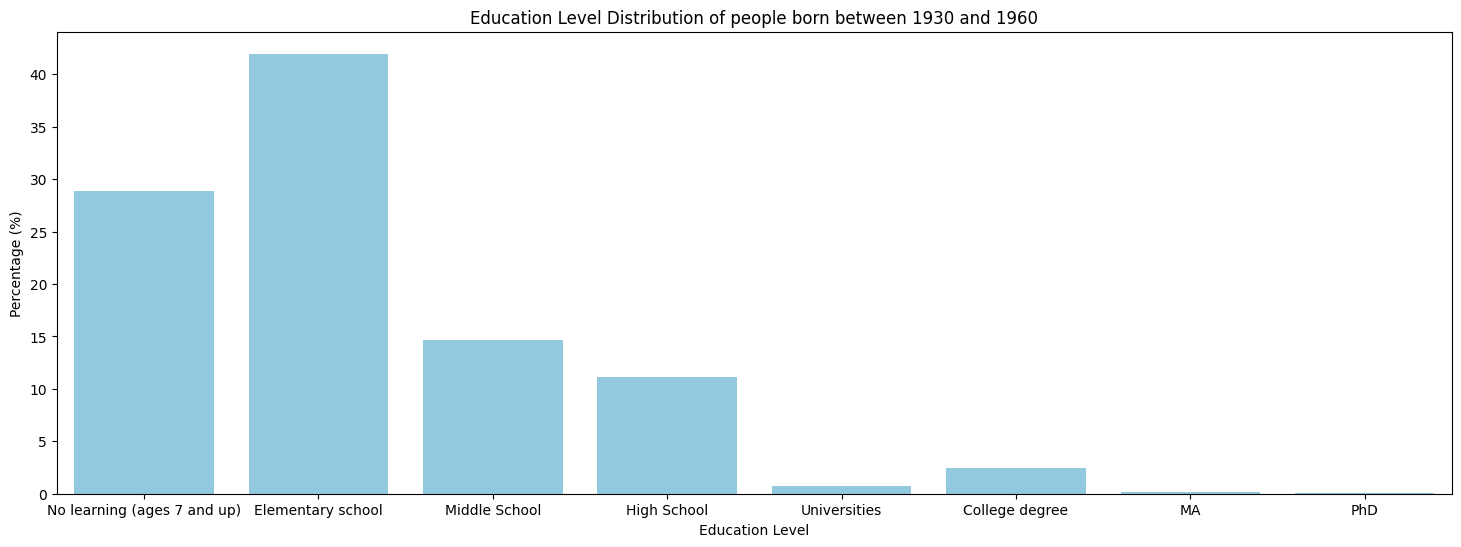

In [ ]:
# Step 3: Visualization
plt.figure(figsize=(18, 6))
sns.barplot(x='education_level', y='percentage', data=education_level_distribution_1930_1960, color='skyblue')
plt.title('Education Level Distribution of people born between 1930 and 1960')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.show()

Income

    year_born       income
0        1930   792.439032
1        1931   863.550055
2        1932   942.250483
3        1933   998.244873
4        1934  1067.562737
5        1935  1160.366065
6        1936  1110.161972
7        1937  1111.577113
8        1938  1136.503107
9        1939  1203.825524
10       1940  1182.072540
11       1941  1223.066696
12       1942  1223.709537
13       1943  1354.603640
14       1944  1585.236628
15       1945  1530.807561
16       1946  1651.754474
17       1947  1443.177105
18       1948  1670.252138
19       1949  1965.108821
20       1950  1803.281096
21       1951  1947.304494
22       1952  1956.996849
23       1953  1988.626908
24       1954  1923.697524
25       1955  1954.751407
26       1956  2574.508889
27       1957  2358.602803
28       1958  2624.892744
29       1959  2748.445234


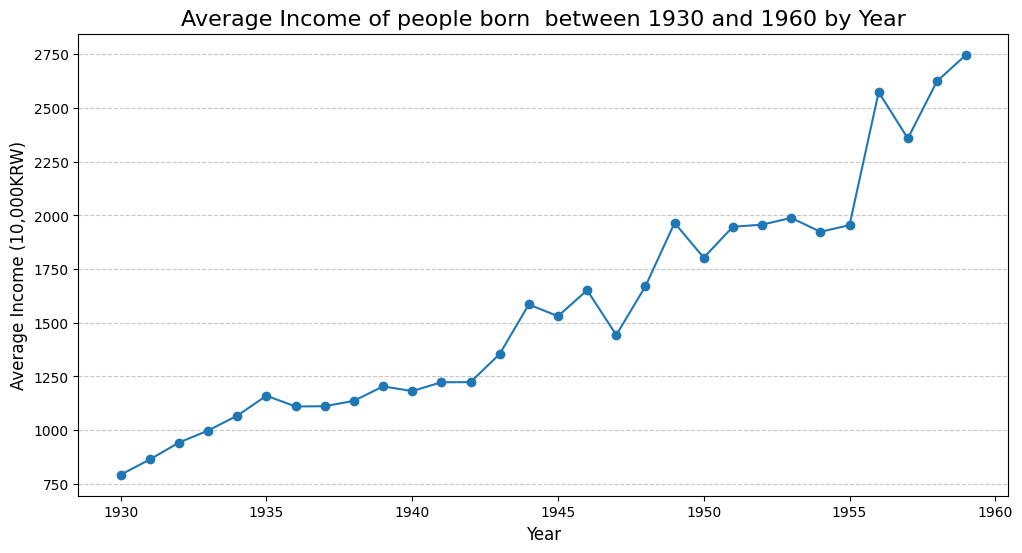

In [ ]:
# 1930_1960 Calculate average earnings by year
income_by_year1 = generation_1930_1960.groupby('year_born')['income'].mean().reset_index()

# Check the results
print(income_by_year1)

#Visualize average earnings by year
plt.figure(figsize=(12, 6))
plt.plot(income_by_year1['year_born'], income_by_year1['income'], marker='o', linestyle='-')

# Visualization
plt.title('Average Income of people born  between 1930 and 1960 by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Income (10,000KRW)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 1960-1980 generation data

In [ ]:
# Step 1: Calculating the Education Level Distribution
education_level_distribution_1960_1980 = generation_1960_1980['education_level'].value_counts(normalize=True, sort=False).reset_index()
education_level_distribution_1960_1980.columns = ['education_level', 'percentage']
education_level_distribution_1960_1980['percentage'] *= 100  # Convert ratios to percentages
education_level_distribution_1960_1980= education_level_distribution_1960_1980.sort_values(by='education_level', ascending=True )

In [ ]:
#Step2 : educatioin levels mapping
education_level_distribution_1960_1980['education_level']=["No learning (ages 7 and up)", "Elementary school",
     "Middle School", "High School", "Universities",
    "College degree", "MA", "PhD"]

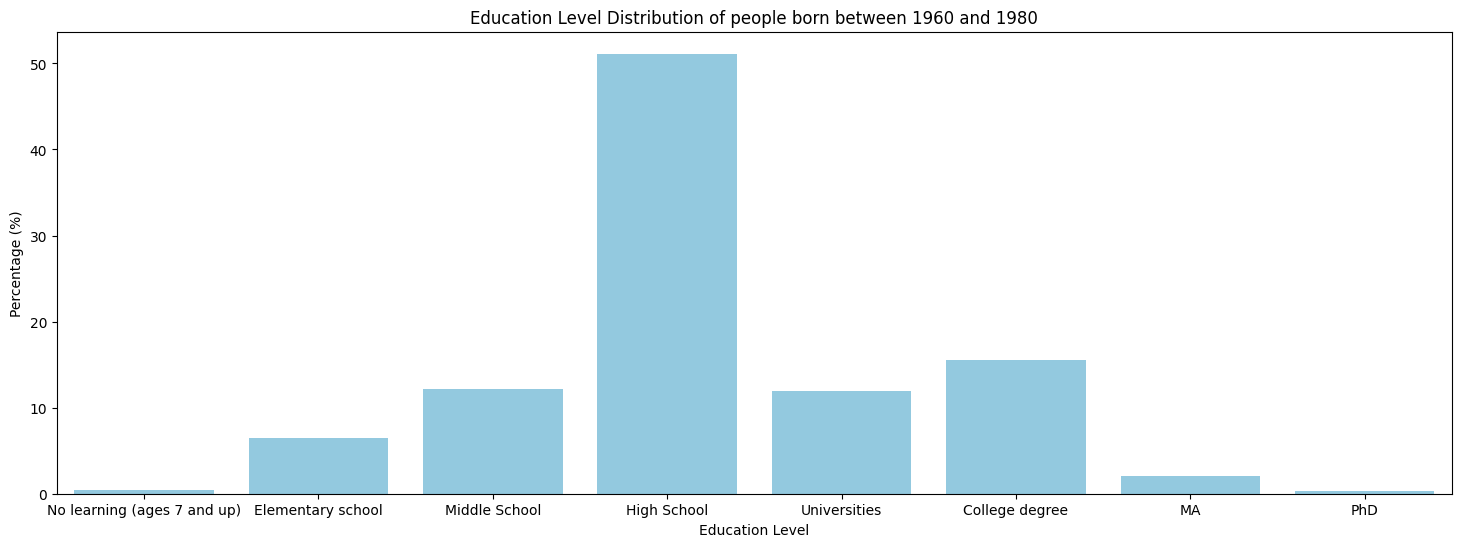

In [ ]:
# Step 3: Visualization
plt.figure(figsize=(18, 6))
sns.barplot(x='education_level', y='percentage', data=education_level_distribution_1960_1980, color='skyblue')
plt.title('Education Level Distribution of people born between 1960 and 1980')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.show()

Income

    year_born       income
0        1960  2686.632589
1        1961  2314.250562
2        1962  2639.034956
3        1963  2841.275616
4        1964  2420.806588
5        1965  2610.047876
6        1966  2637.327568
7        1967  2858.060042
8        1968  2724.120755
9        1969  3028.903836
10       1970  2916.871318
11       1971  3296.984458
12       1972  2946.965517
13       1973  3099.247651
14       1974  2737.794070
15       1975  3306.401961
16       1976  2759.157741
17       1977  3018.999237
18       1978  3165.747312
19       1979  3195.859438


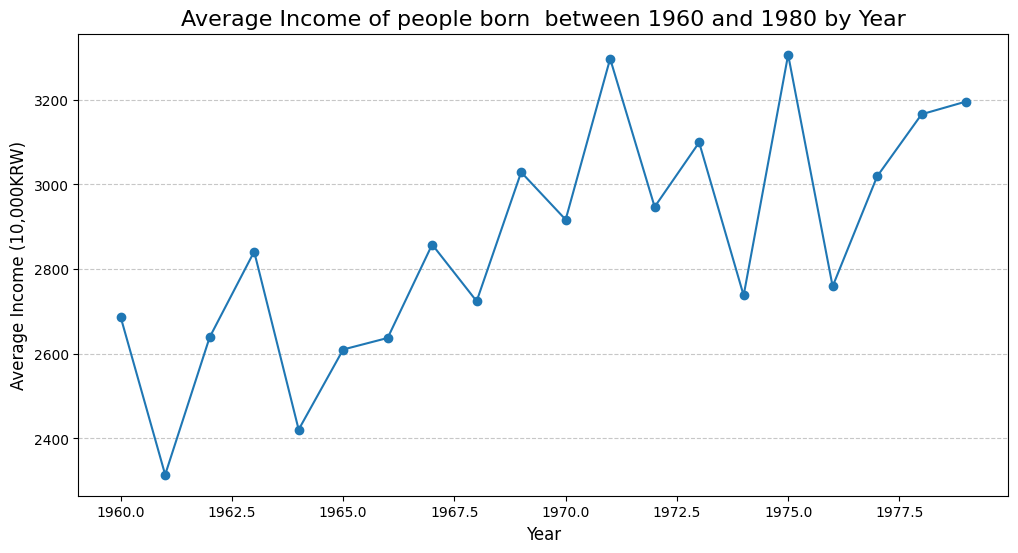

In [ ]:
# Calculate average earnings by year 1960_1980
income_by_year2 = generation_1960_1980.groupby('year_born')['income'].mean().reset_index()

# Check the results
print(income_by_year2)

#Visualize average earnings by year
plt.figure(figsize=(12, 6))
plt.plot(income_by_year2['year_born'], income_by_year2['income'], marker='o', linestyle='-')

# Visualization
plt.title('Average Income of people born  between 1960 and 1980 by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Income (10,000KRW)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Marriage

<ipython-input-20-991da0afa266>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generation_marriage_rate = data.groupby('generation')['has_marriage_experience'].mean().reset_index()


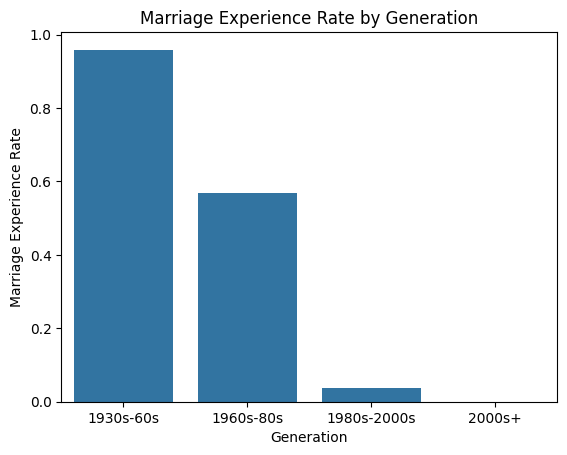

In [ ]:
# marital experience by generation
generation_marriage_rate = data.groupby('generation')['has_marriage_experience'].mean().reset_index()

# Visualization
sns.barplot(x='generation', y='has_marriage_experience', data=generation_marriage_rate)
plt.title('Marriage Experience Rate by Generation')
plt.xlabel('Generation')
plt.ylabel('Marriage Experience Rate')
plt.show()

# 1980-2000 generation data

In [ ]:
# Step 1: Calculating the Education Level Distribution
education_level_distribution_1980_2000 = generation_1980_2000['education_level'].value_counts(normalize=True, sort=False).reset_index()
education_level_distribution_1980_2000.columns = ['education_level', 'percentage']
education_level_distribution_1980_2000['percentage'] *= 100  # Convert ratios to percentages
education_level_distribution_1980_2000= education_level_distribution_1980_2000.sort_values(by='education_level', ascending=True )



In [ ]:

#Step2 : educatioin levels mapping
education_level_distribution_1980_2000['education_level']=[ "Elementary school",
     "Middle School", "High School", "Universities",
    "College degree", "MA", "PhD"]


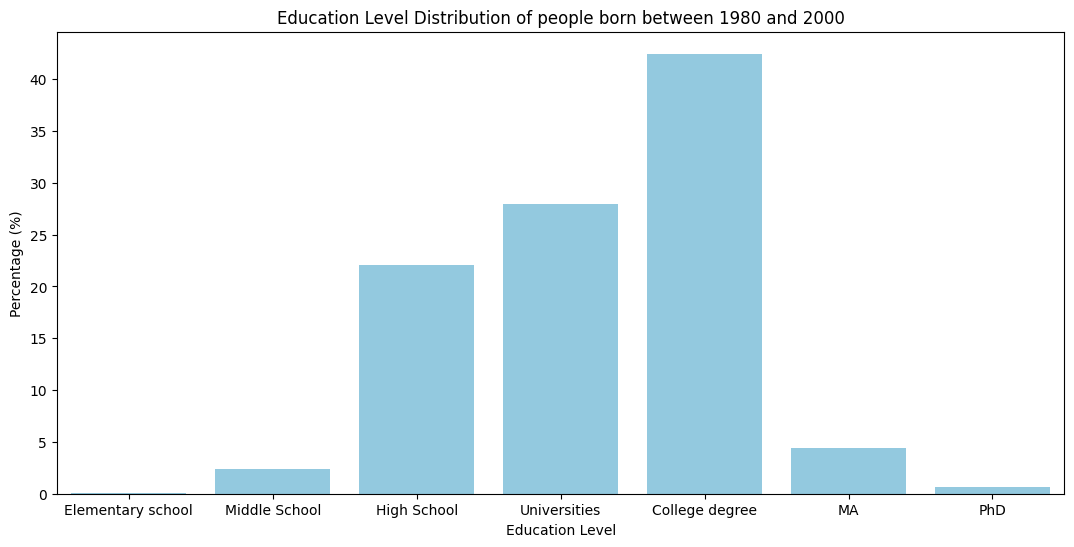

In [ ]:
# Step 3: Visualization
plt.figure(figsize=(13, 6))
sns.barplot(x='education_level', y='percentage', data=education_level_distribution_1980_2000, color='skyblue')
plt.title('Education Level Distribution of people born between 1980 and 2000')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.show()

Income

In [ ]:
# Calculate average earnings by year 1980_2000
income_by_year1 = generation_1980_2000.groupby('year_born')['income'].mean().reset_index()

# Check the results
print(generation_1980_2000)

             id  year  wave  region  income  family_member  gender  year_born  \
365      370101  2005     1       1  3090.0              2       2       1981   
366      370101  2006     2       1  2256.0              2       2       1981   
381      390101  2005     1       1  2430.0              2       1       1980   
382      390101  2006     2       1  2139.0              2       1       1980   
383      390101  2007     3       1  2417.0              2       1       1980   
...         ...   ...   ...     ...     ...            ...     ...        ...   
92745  97850801  2015    11       6  1443.0              1       2       1986   
92746  97850801  2016    12       6  2898.0              1       2       1986   
92747  97850801  2017    13       6  4300.0              1       2       1986   
92748  97850801  2018    14       6  5514.0              1       2       1986   
92801  97931201  2016    12       5  3636.0              1       2       1993   

       education_level  mar

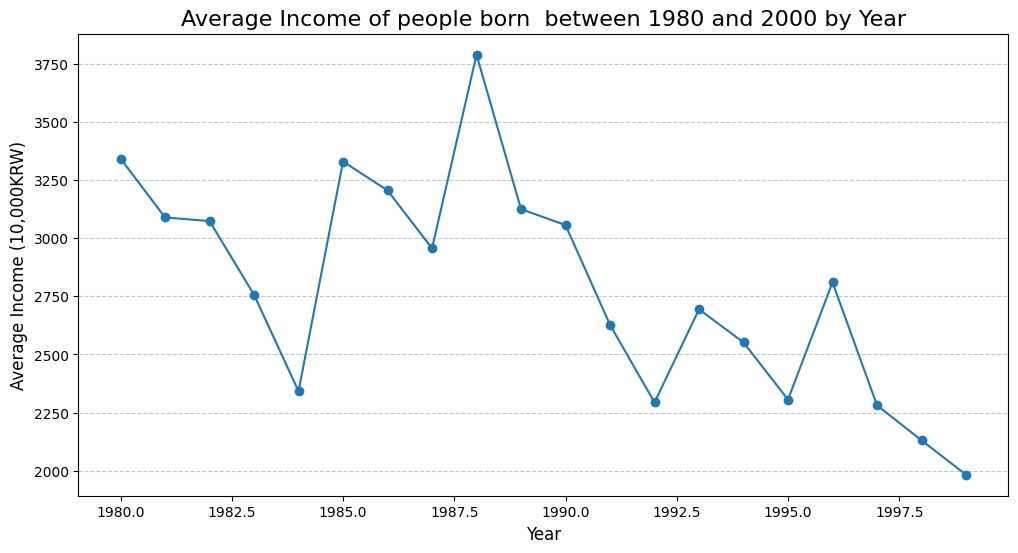

In [ ]:
#Visualize average earnings by year
plt.figure(figsize=(12, 6))
plt.plot(income_by_year1['year_born'], income_by_year1['income'], marker='o', linestyle='-')

# Visualization
plt.title('Average Income of people born  between 1980 and 2000 by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Income (10,000KRW)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Average income by Generation

In [ ]:
# Filter data with a family size of 1
data_single = data[data['family_member'] == 1]
data_single.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,age,generation,has_marriage_experience
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8,82,1930s-60s,1
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10,82,1930s-60s,1
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10,82,1930s-60s,1
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1,82,1930s-60s,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10,82,1930s-60s,1


In [ ]:
#Filter for 2017
data_2017 = data_single[data_single['year'] == 2017]

In [ ]:
data_2017.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,age,generation,has_marriage_experience
7,10101,2017,13,1,851.0,1,2,1936,2,2,2,,,10,82,1930s-60s,1
20,20101,2017,13,1,1474.0,1,2,1945,4,2,1,,,10,73,1930s-60s,1
34,30101,2017,13,1,698.0,1,1,1948,3,2,2,,,10,70,1930s-60s,1
87,80101,2017,13,2,1440.0,1,2,1940,3,2,1,999,2,,78,1930s-60s,1
138,140101,2017,13,1,434.0,1,1,1962,6,5,1,,,9,56,1960s-80s,0


In [ ]:
# Calculate average revenue per household
income_by_generation = data_2017.groupby('generation')['income'].mean().reset_index()
print(income_by_generation)

    generation       income
0    1930s-60s  1312.858433
1    1960s-80s  2985.961307
2  1980s-2000s  3054.746667
3       2000s+          NaN


<ipython-input-38-2efee907b906>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_generation = data_2017.groupby('generation')['income'].mean().reset_index()


<ipython-input-39-ad8e76be73b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generation', y='income', data=income_by_generation, palette='coolwarm')


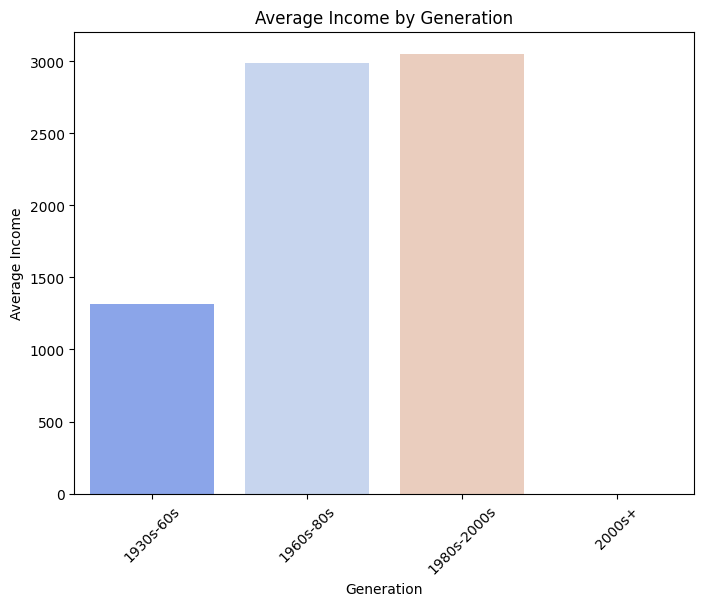

In [ ]:
# Visualize average revenue by generation
plt.figure(figsize=(8, 6))
sns.barplot(x='generation', y='income', data=income_by_generation, palette='coolwarm')
plt.title('Average Income by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()